# TP

## Pour déterminer la droite de régression, on peut utiliser la méthode des moindres carrés :

La méthode des moindres carrés consiste à déterminer la droite dite « de régression de y en x » qui rend minimale la somme

On doit donc calculer la moyenne et l'écart-type de la température et du rendement, ainsi que la covariance entre ces deux variables. Ensuite, on peut calculer les coefficients a et b de la droite de régression. Ainsi, la droite de régression linéaire est : y = a x + b

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Données observées
x = np.array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])
y = np.array([45, 51, 54, 61, 66, 70, 74, 78, 85, 89])

# Droite de régression
A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
print("La droite de régression est y = {:.2f}x + {:.2f}".format(a, b))

La droite de régression est y = 0.48x + -2.74


## Pour calculer le coefficient de détermination, on peut utiliser la formule suivante :

Le coefficient de détermination, noté R², est une mesure de la qualité de l'ajustement de la droite de régression aux données. Il représente la proportion de la variance totale du rendement qui est expliquée par la variable température. Plus R² est proche de 1, meilleure est l'ajustement.
Le coefficient de détermination se calcule comme le carré du coefficient de corrélation entre les deux variables r(X,Y)

In [20]:
# Coefficient de détermination
y_pred = a*x + b
SS_tot = np.sum((y - np.mean(y))**2)
SS_res = np.sum((y - y_pred)**2)
R2 = 1 - SS_res/SS_tot
print("Le coefficient de détermination est R^2 = {:.2f}".format(R2))

Le coefficient de détermination est R^2 = 1.00


Cela signifie que 100% de la variance des rendements peut être expliquée par la température de fonctionnement.

## Pour déterminer la nouvelle droite de régression, on peut utiliser les données modifiées :

In [22]:
# Nouvelles données observées
x_new = np.array([100, 105, 110, 120, 130, 140, 150, 160, 170, 180, 190])
y_new = np.array([45, 70, 51, 54, 61, 66, 70, 74, 78, 85, 89])

# Nouvelle droite de régression
A_new = np.vstack([x_new, np.ones(len(x_new))]).T
a_new, b_new = np.linalg.lstsq(A_new, y_new, rcond=None)[0]
print("La nouvelle droite de régression est y = {:.2f}x + {:.2f}".format(a_new, b_new))

La nouvelle droite de régression est y = 0.40x + 10.93


## Pour comparer les deux situations via le coefficient de détermination, on peut calculer les deux R^2 :

In [23]:
# Coefficient de détermination pour les données modifiées
y_pred_new = a_new*x_new + b_new
SS_tot_new = np.sum((y_new - np.mean(y_new))**2)
SS_res_new = np.sum((y_new - y_pred_new)**2)
R2_new = 1 - SS_res_new/SS_tot_new
print("Le coefficient de détermination pour les données modifiées est R^2 = {:.2f}".format(R2_new))

Le coefficient de détermination pour les données modifiées est R^2 = 0.80


On constate que le coefficient de détermination a diminué, ce qui montre que les deux points écartés avaient une influence sur la qualité de la droite de régression. Cela montre également l'importance de prendre en compte tous les points disponibles pour obtenir une droite de régression fiable.

# Moi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("matrice.csv")

In [4]:
data

,Température,Rendement
0,100,45
1,110,51
2,120,54
3,130,61
4,140,66
5,150,7
6,160,74
7,170,78
8,180,85
9,190,89


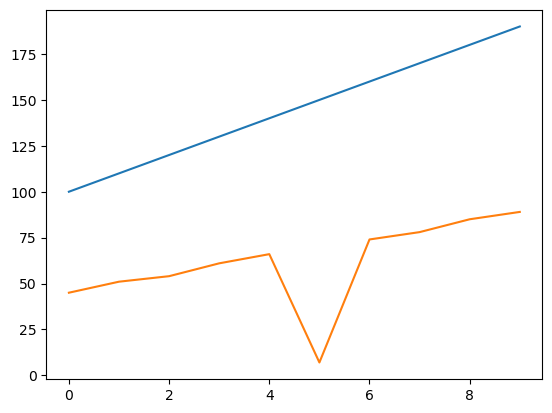

In [5]:
plt.plot(data)

In [6]:
data.head()

,Température,Rendement
0,100,45
1,110,51
2,120,54
3,130,61
4,140,66


In [6]:
data.tail()

,X,Y
5,150,7
6,160,74
7,170,78
8,180,85
9,190,89


In [7]:
corr=data.corr()
print(corr)

             Température  Rendement
Température     1.000000   0.562271
Rendement       0.562271   1.000000


In [8]:
from numpy.linalg import eig
[Lamda,A]=eig(corr)

In [9]:
print(Lamda)

[1.56227137 0.43772863]


In [10]:
print(sum(Lamda))

1.9999999999999998


In [11]:
print(A)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [12]:
def pour_inertie(Lamda):
    L=[]
    n = sum(Lamda)
    # 0, fait ,1 par défaut
    for i in range(Lamda.shape[0]): 
            L.append(Lamda[i]/n*100)
    return np.array(L)

In [13]:
pour_inertie(Lamda)

array([78.11356868, 21.88643132])

In [14]:
sum(pour_inertie(Lamda)[0:2])

100.0

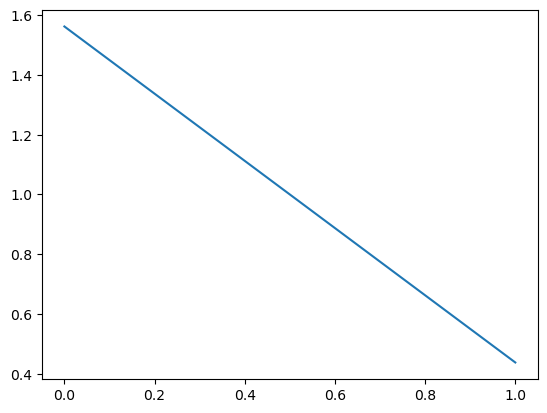

In [15]:
plt.plot(Lamda)

In [16]:
data1 = data.corr()

In [17]:
Y1=np.dot(data1,A[0].T)
Y1.shape 

(2,)

In [18]:
Y=np.dot(data1,A[0:2].T)

In [19]:
Y.shape

(2, 2)

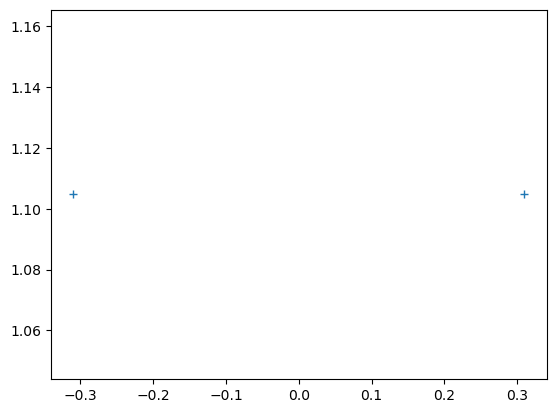

In [20]:
plt.plot(Y[:,0],Y[:,1],"+") # plt.plot(Y[0],Y[1])